### Multi-Agents:
According to this [paper](https://arxiv.org/abs/1706.02275), we can create mult-agents. For the DDPG, the actors observe their own environment, but for the critic, we share the actions of all agents.

### The structure of the DDPG:
The DDPG has two component: actor and critic:
- actor: A two hidden layers network, the input is the state and the output is the best actions in action space. It has two hidden layers with 256 and 256 nodes respectively. The active function is relu except the last layer :tanh
- critic: A two hidden layers layer network, the input the state and action (all agents action). The first layer input is the state, and the outcome of the first layer will be combined with the action. Then they are feeded into the second hidden layer. The output of the critic is the action value. 
### Training Algorithm:
According to this [paper](https://arxiv.org/pdf/1509.02971.pdf), two techniques are used.For the replay, priority replay is used in this project:
1. Priority Experience Replay: A pool of $2^{17}$ ("state","action","reward","next_state","done") is used. Each time 512 random samples are selected from the pool for training. The priority used in this project is the sum of the absolute values of the critic errors (which is used to minimize) of all agents.
2. Fixed target network: two same structure networks are used for both actor and critic. A local network is updated every 1 step. A target network is updated by using only 1/1000 of the local network every time (soft update) 

The critic network is updated by the following equation  : <br/>
$U(D)[(r+\gamma Q'(s',\mu';w^{-})-Q(s,\mu;w))^2] $ <br/>
$U(D)$ stands for the the minibatch we random sample from the experience pool (including the weight from the priority) and can break the correlation between the continuously  Q value and the action.$\mu$ is the outcome of the action network For each step, we update $w$ every 1 step and $w^{-}$ is only updated 1/1000 of the $w$ each time. Since updating a guess with a guess can lead to harmful correlation <br/>
This algorithm works, we can see the improvement of the rewards.<br/>

The actor network is updated by maximize the q value from the critic network by using the gradient ascent. Other techniques used are the same as the critic network. 

### Training hyperparameters:
episodes used for training the one agent version is 8000, learning rate is 0.001 and it takes about 1400 episodes to solve it.
### Future ideas:
1. PPO
2. Try different network structure

In [1]:
import matplotlib.pyplot as plt
import numpy as np

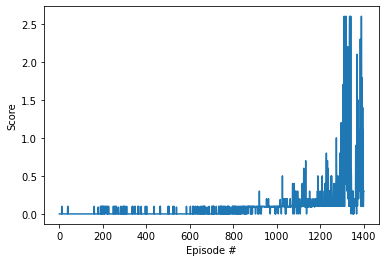

In [3]:
#one agent version
scores_data = np.load("scores_data.npz")
scores=scores_data['arr_0'].reshape(-1,2)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(scores.shape[0]),scores.max(axis=1))
plt.ylabel('Score')
plt.xlabel('Episode #');